Saving 275665853_658921542045650_512855639586224313_n.jpg to 275665853_658921542045650_512855639586224313_n (1).jpg


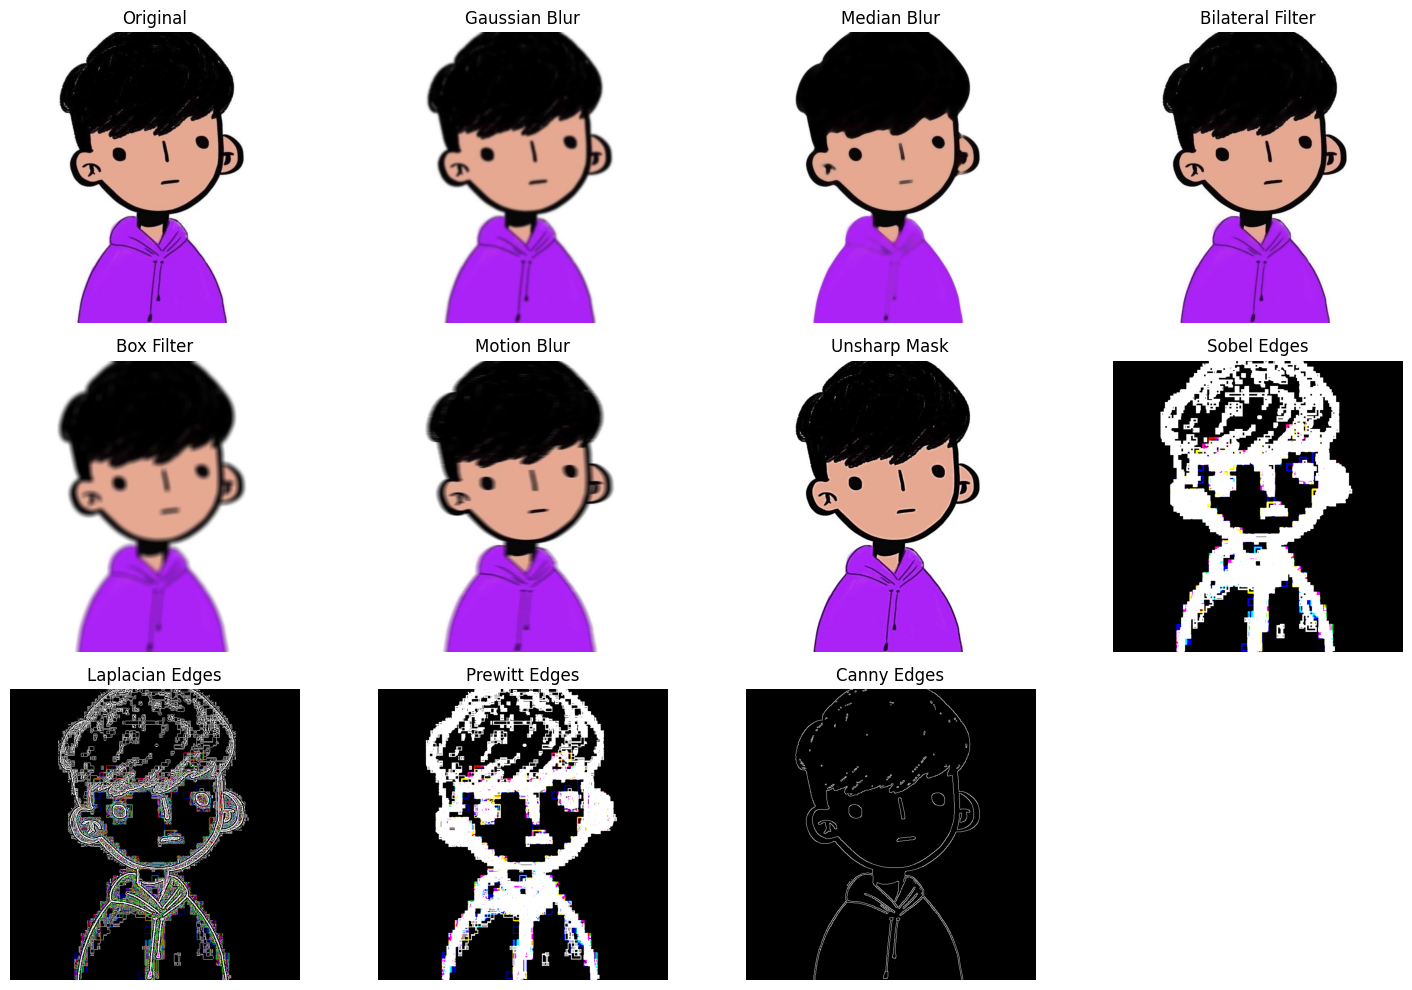

In [2]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Upload an image
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise ValueError("Image not loaded correctly. Please upload a valid image file.")

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Apply blurring techniques
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (15, 15), 0)

# Median Blur
median_blur = cv2.medianBlur(image, 15)

# Bilateral Filter
bilateral_filter = cv2.bilateralFilter(image, 15, 75, 75)

# Box Filter
box_filter = cv2.boxFilter(image, -1, (15, 15))

# Motion Blur (simulating with a kernel)
kernel_motion_blur = np.zeros((15, 15))
kernel_motion_blur[int((15 - 1) / 2), :] = np.ones(15)
kernel_motion_blur /= 15
motion_blur = cv2.filter2D(image, -1, kernel_motion_blur)

# Unsharp Mask
gaussian = cv2.GaussianBlur(image, (15, 15), 0)
unsharp_mask = cv2.addWeighted(image, 1.5, gaussian, -0.5, 0)

# Step 4: Apply edge detection techniques
# Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Laplacian Edge Detection
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)

# Prewitt Edge Detection (manual kernel)
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

# Apply Prewitt filter
prewitt_edges_x = cv2.filter2D(image.astype(np.float32), -1, prewitt_x)
prewitt_edges_y = cv2.filter2D(image.astype(np.float32), -1, prewitt_y)

# Calculate magnitude
prewitt_edges = cv2.magnitude(prewitt_edges_x, prewitt_edges_y)

# Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)

# Step 5: Prepare images for display
images = [image, gaussian_blur, median_blur, bilateral_filter, box_filter,
          motion_blur, unsharp_mask, sobel_edges, laplacian_edges,
          prewitt_edges, canny_edges]

titles = ['Original', 'Gaussian Blur', 'Median Blur', 'Bilateral Filter',
          'Box Filter', 'Motion Blur', 'Unsharp Mask', 'Sobel Edges',
          'Laplacian Edges', 'Prewitt Edges', 'Canny Edges']

# Create a 3x4 grid to display images
plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray' if i >= 7 else None)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
